# Imports

In [1]:
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

from src.algorithms import AbstractMetropolisHastings

figsize(20, 3)

# VMC

The goal of this section is to calculate $\int ... dR $

$$
\left \{
\begin{array}{rll}
H &= - \frac{\partial^2}{2 \partial x^2} +V(x) & \text{Hamiltonian}\\
\psi(R) &= \exp({-p_0(x-p_1)^2-p_2(x-p_3)^2}) & \text{Wave function}\\
E_L(R) &= \frac{H\psi(R)}{\psi(R)} = V(x) - \frac{1}{2}\frac{\partial^2}{\partial x^2}\psi(x) & \text{"Local" energy}\\
V(x) &= \frac{a_2}{2}x^2 + a_4x^4 & \text{Potential energy}\\
G(R,R', \beta) &= \braket{R | e^{- \beta H} | R'} & \text{???}\\
\Pi(R) &\propto | \psi(R) |^2 & \text{Sampling probability???}\\
\end{array}
\right .
$$

In [2]:
class VMC(AbstractMetropolisHastings[float]):
    a = [1, 0]
    p = [.0002, 0, 0, 0]
    sigma = 5

    def generator_function(self):
        return self.current_configuration + np.random.normal(0, self.sigma)

    def state_likelihood(self, x: float):
        # This is proportional to the state probability
        p = self.p
        aux_exp = lambda mu, sigma: np.prod([-1, mu, x - sigma, x - sigma])
        return np.exp(aux_exp(p[0], p[1]) + aux_exp(p[2], p[3]))


In [3]:
vmc = VMC(initial_configuration=10 ** 2)

## Likelihood plot

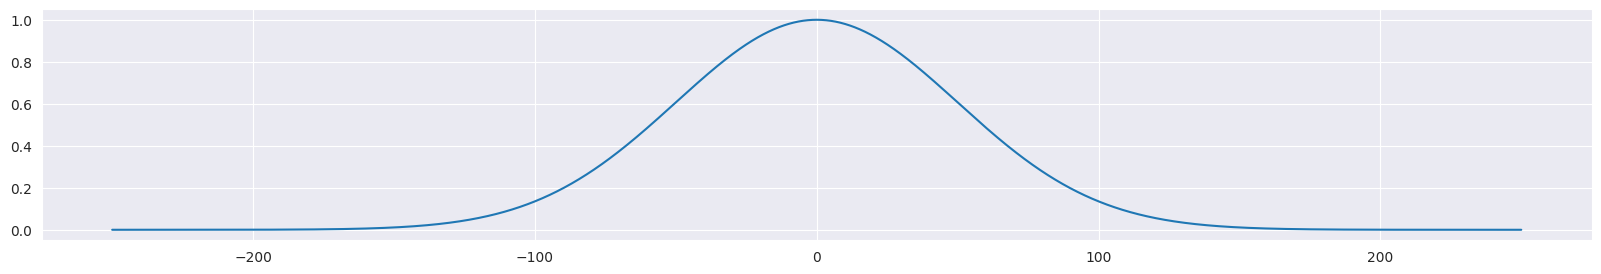

In [4]:
datapoints = np.linspace(-250, 250, 10000)
plt.plot(datapoints, [vmc.state_likelihood(x) for x in datapoints])

## Trial run

In [5]:
vmc.run_iterations(10 ** 7)

Rejected 3.2%: 100%|██████████| 10000000/10000000 [03:07<00:00, 53287.25it/s]


## Plot

100%|██████████| 10000/10000 [00:00<00:00, 95544.19it/s]


(array([4.00000e+00, 1.00000e+00, 2.00000e+00, 4.00000e+00, 5.00000e+00,
        1.80000e+01, 2.30000e+01, 2.40000e+01, 3.70000e+01, 5.70000e+01,
        1.07000e+02, 1.75000e+02, 2.84000e+02, 4.08000e+02, 5.72000e+02,
        8.21000e+02, 1.14200e+03, 1.46700e+03, 2.14100e+03, 2.97500e+03,
        3.97400e+03, 5.35500e+03, 6.80800e+03, 9.02000e+03, 1.15270e+04,
        1.45210e+04, 1.86830e+04, 2.35130e+04, 2.90740e+04, 3.53090e+04,
        4.34280e+04, 5.22090e+04, 6.25380e+04, 7.41410e+04, 8.82160e+04,
        1.04142e+05, 1.20521e+05, 1.40175e+05, 1.59770e+05, 1.80273e+05,
        2.01654e+05, 2.24566e+05, 2.46575e+05, 2.70817e+05, 2.93902e+05,
        3.14973e+05, 3.34814e+05, 3.51116e+05, 3.65069e+05, 3.77131e+05,
        3.85824e+05, 3.92685e+05, 3.94064e+05, 3.89166e+05, 3.82066e+05,
        3.69446e+05, 3.54676e+05, 3.36942e+05, 3.17454e+05, 2.97950e+05,
        2.77029e+05, 2.53708e+05, 2.29498e+05, 2.06482e+05, 1.84146e+05,
        1.63336e+05, 1.43507e+05, 1.25639e+05, 1.07

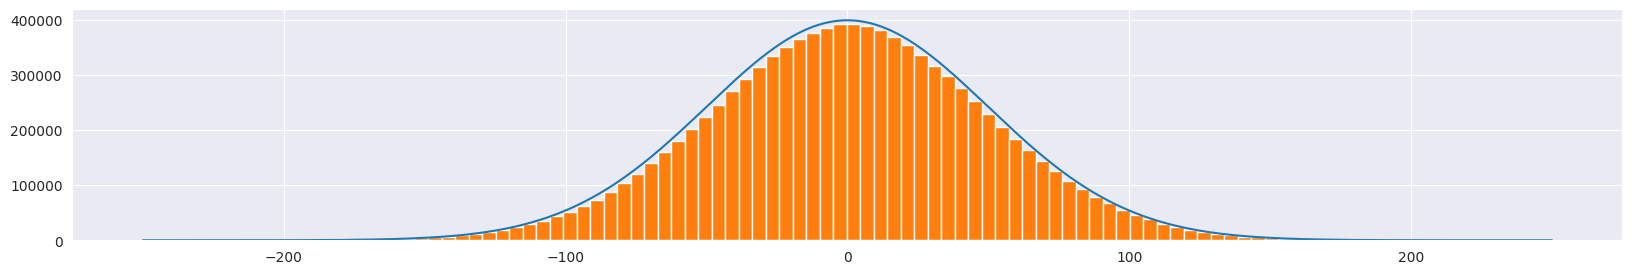

In [6]:
plt.plot(datapoints, [4 * 10 ** 5 * vmc.state_likelihood(x) for x in datapoints])
plt.hist(vmc.configuration_history, bins=100, density=False)